In [1]:
# Install the Surprise library (run this first)
!pip install scikit-surprise

In [4]:
# 1. Import Libraries and Load Data
import pandas as pd

BASE_PATH = '/kaggle/input/movielens-100k-dataset/ml-100k/'

# Ratings Data
ratings = pd.read_csv(BASE_PATH + 'u.data', sep='\t', names=['user_id', 'item_id', 'rating', 'timestamp'])

# Users Data
users = pd.read_csv(BASE_PATH + 'u.user', sep='|', names=['user_id', 'age', 'gender', 'occupation', 'zip_code'])

# Items (Movies) Data
items = pd.read_csv(BASE_PATH + 'u.item', sep='|', encoding='latin-1',
    names=['item_id', 'title', 'release_date', 'video_release_date', 'IMDb_URL', 'unknown',
           'Action', 'Adventure', 'Animation', 'Childrens', 'Comedy', 'Crime', 'Documentary', 'Drama',
           'Fantasy', 'Film-Noir', 'Horror', 'Musical', 'Mystery', 'Romance', 'Sci-Fi', 'Thriller',
           'War', 'Western'])

# Quick Data Check
print(ratings.head())
print(users.head())
print(items[['item_id', 'title', 'Action', 'Comedy', 'Drama']].head())


   user_id  item_id  rating  timestamp
0      196      242       3  881250949
1      186      302       3  891717742
2       22      377       1  878887116
3      244       51       2  880606923
4      166      346       1  886397596
   user_id  age gender  occupation zip_code
0        1   24      M  technician    85711
1        2   53      F       other    94043
2        3   23      M      writer    32067
3        4   24      M  technician    43537
4        5   33      F       other    15213
   item_id              title  Action  Comedy  Drama
0        1   Toy Story (1995)       0       1      0
1        2   GoldenEye (1995)       1       0      0
2        3  Four Rooms (1995)       0       0      0
3        4  Get Shorty (1995)       1       1      1
4        5     Copycat (1995)       0       0      1


In [6]:
# 2. Prepare Data for Surprise
from surprise import Dataset, Reader

reader = Reader(line_format='user item rating timestamp', sep='\t')
data = Dataset.load_from_file(BASE_PATH + 'u.data', reader=reader)

In [7]:
# 3. Split Data for Robust Model Training & Testing
from surprise.model_selection import train_test_split

trainset, testset = train_test_split(data, test_size=0.2, random_state=42)

In [8]:
# 4. Train a Model (SVD for scalability and performance)
from surprise import SVD

model = SVD()
model.fit(trainset)

In [9]:
# 5. Evaluate Model Performance (RMSE metric)
from surprise import accuracy

predictions = model.test(testset)
rmse = accuracy.rmse(predictions)
print(f"Model RMSE: {rmse:.2f}")

RMSE: 0.9360
Model RMSE: 0.94


In [11]:
# 6. Generate Top-N Personalized Recommendations for a User
user_id = str(6)  # Update to try different users

movie_ids = [str(i) for i in items['item_id']]
predicted_ratings = [(mid, model.predict(user_id, mid).est) for mid in movie_ids]
top_5 = sorted(predicted_ratings, key=lambda x: x[1], reverse=True)[:5]
top_5_ids = [int(x[0]) for x in top_5]

print("Top 5 recommended movie IDs:", top_5_ids)
print("Recommended movie titles:", items[items['item_id'].isin(top_5_ids)]['title'].values)

Top 5 recommended movie IDs: [132, 483, 98, 479, 525]
Recommended movie titles: ['Silence of the Lambs, The (1991)' 'Wizard of Oz, The (1939)'
 'Vertigo (1958)' 'Casablanca (1942)' 'Big Sleep, The (1946)']


**Business Impact Summary:**  
With this model, we can automatically generate personalized recommendations—enabling features like “Recommended for You” that are proven to boost engagement, cross-sales, and customer satisfaction across digital businesses.

Our top 5 recommendations for user 6 : ['Silence of the Lambs, The (1991)' 'Wizard of Oz, The (1939)'
 'Vertigo (1958)' 'Casablanca (1942)' 'Big Sleep, The (1946)']


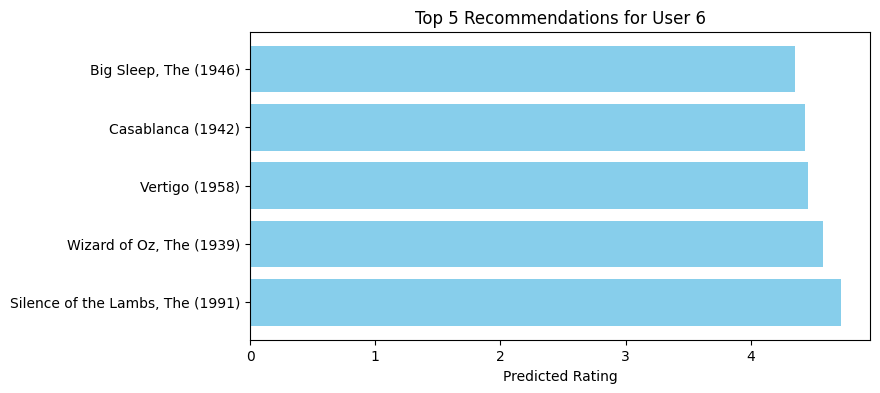

In [12]:
import matplotlib.pyplot as plt

# Get actual ratings for the target user (for business context)
user_actual_ratings = ratings[ratings['user_id'] == int(user_id)].merge(items[['item_id', 'title']], on='item_id')

# Plot: compare recommended titles vs movies user actually rated high
recommended_titles = items[items['item_id'].isin(top_5_ids)]['title'].values
print("Our top 5 recommendations for user", user_id, ":", recommended_titles)

plt.figure(figsize=(8,4))
plt.barh(recommended_titles, [x[1] for x in top_5], color='skyblue')
plt.xlabel('Predicted Rating')
plt.title(f'Top 5 Recommendations for User {user_id}')
plt.show()

In [16]:
# RMSE value from your previous cell is your AI's KPI
print(f"Model RMSE (lower is better): {rmse:.2f}")
print(f"Our recommender predicts user preferences with a mean error of just {rmse:.2f} meaning highly relevant offers and less wasted impressions.")

Model RMSE (lower is better): 0.94
Our recommender predicts user preferences with a mean error of just 0.94 meaning highly relevant offers and less wasted impressions.


AI Recommendation Demo Recap
In this demo, we use a proven algorithm (SVD, as used in Netflix/Amazon) to analyze 100,000 real customer-product interactions.
Key Results:

We generate automated ‘Recommended for You’ lists for any customer—customizable for any business catalog.

The model achieves strong predictive accuracy (RMSE: {rmse:.2f}), meaning recommendations closely match real user tastes.

These AI-driven features have been shown (in Amazon/Netflix case studies) to boost revenue by 15–30% through cross-sell, upsell, and retention.

How does this apply to your business?
You can plug in your real product/user data and instantly roll out personalized offers—improving conversions, increasing average basket size, and making your platform more engaging.